In [1]:
#machine learning project of iris flower dataset.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


df  = pd.read_csv('IRIS.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
#deleting columns
# df = df.drop(columns=['id'])
# df.head(5)
#to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#data information =>basic info about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#to display no of sample on each class
df['species'] .value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
#PROCESSING THE DATASET
#Check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
#EXPLORATORY DATA ANALYTICS

<AxesSubplot:>

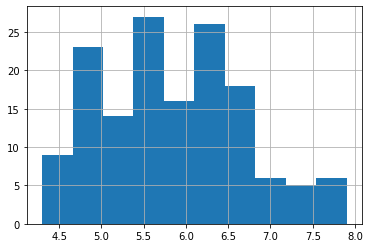

In [8]:
df['sepal_length'].hist()

<AxesSubplot:>

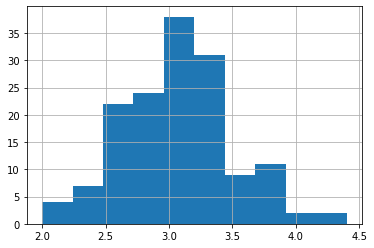

In [9]:
df['sepal_width'].hist()

<AxesSubplot:>

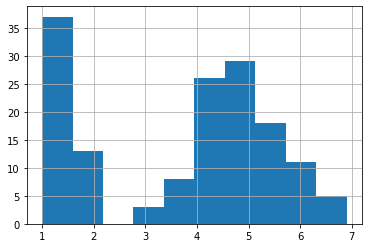

In [10]:
df['petal_length'].hist()

<AxesSubplot:>

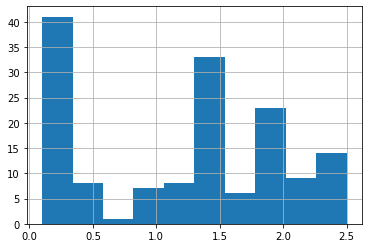

In [11]:
df['petal_width'].hist()

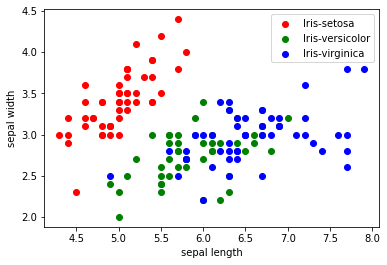

In [12]:
#scatterplot
colors =['red','green','blue']
species =['Iris-setosa','Iris-versicolor','Iris-virginica']
#for 3 color in 3 species for sepal
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c = colors[i],label=species[i])
    
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

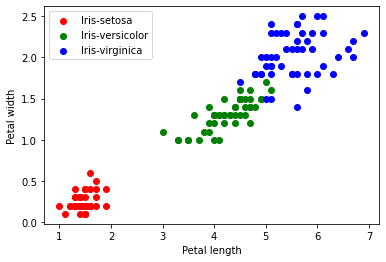

In [13]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = colors[i],label=species[i])
    
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

In [14]:
#COOrelation Matrix 
#A correlation matrix is a table showing correlation coefficient between variables.each cellin the table shows the correlation between two variables.The values is in the range of -1 to 1.if two variables have high correlation, we can neglect one variables from those two

In [15]:
#corr matrix
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

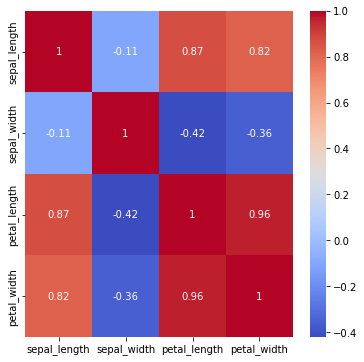

In [16]:
corr=df.corr()
#set size of graph 
fig,ax= plt.subplots(figsize=(6,6))
sns.heatmap(corr, annot = True,ax=ax, cmap='coolwarm')
#display value in matrix


In [17]:
#LABEL ENCODER 
#IN machine learning , we usually deal with datasets which contains multiple labels in one or more than one columns.These labels can be in the form of words or numbers .Lbel Encoding refers to converting the labels into numeric form so as to convert it into machine-readble form.

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
#Model Training

In [32]:
from sklearn.model_selection import train_test_split
#train -70
#test-30
X = df.drop(columns=['species'])
Y = df['species']
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.30)

In [36]:
#logistric regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
#print metric to get performance
print("Accuracy:", model.score(X_test,Y_test)*100)

Accuracy: 93.33333333333333


C:\Users\paaru\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#knn-knearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier()
model.fit(X_train,Y_train)
#print metric t get performance 
print('Accuracy:', model.score(X_test, Y_test)*100)

Accuracy: 97.77777777777777


In [35]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
print('Accuracy:', model.score(X_test,Y_test)*100)

Accuracy: 93.33333333333333
